# Image Filtering Module

**Notes from Hany Farid's Computer Vision Course (UC Berkley)**
https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/

## Convolutions
We begin the lessons on convolutions with a discussion of discrete-time signals and systems as well as an intro to linear time-invariant systems in 1-dimension. 

Two keys to the magic of Linear Time-Invariant systems are:

### 1. Linear property - you can just scale the output instead of the input

The fact that these systems are linear in nature means that it is functionally the same thing to pass our system a scaled value as it is to pass a raw value into the system and then scale the output. 

For example, our Linear Time-Invariant System (LTI) can be written as:

$ g[x] = T\{f[x]\}$

or

$ g[x] = T \bigg\{ 
\sum\limits_{k=-\infty}^\infty f[k]\delta[x-k]
\bigg\} $

So we can see the linear properly at play when, instead of scaling the delta (signal) by $f[k]$ inside the LTI system $T$, we can pull out that scale term and pass only the signal value itself into $T$ and scale the output of our system by $f[k]$.

$ g[x] = 
\sum\limits_{k=-\infty}^\infty f[k]T\{\delta[x-k]\}
$

### 2. Time-invariant property - you can just shift the output instead fo shifting the input

This means that if we define the output of our LTI $T\{\delta[x]\}$ as $h[x]$ then we can just add a shifting term to h instead of passing a shifted value into $T$

$ h[x] = T\{\delta[x]\}$

$ g[x] = 
\sum\limits_{k=-\infty}^\infty f[k]h[x-k]\}
$



Because of the two properties above we can just manipulate the output from one discrete signal (scaling and shifting) instead of needing to pass new inputs into the LTI system and re-compute everything.

> "A single unit-impulse response fully characterizes the linear time-invariant system"

So the above is a convolution but we note it using $\star$ notation like:

$ g[x] = (f \star h)[x]$

or

$ g[x] = f[x] \star h[x] $

And because our LTI system is a linear system of equations, we can solve for this with matrix multiplication like:

$ \begin{pmatrix}
g[0] \\
g[1] \\
g[2] \\
\vdots \\
g[n-1] \\
g[n]
\end{pmatrix} = \begin{pmatrix}
h_0 & h_{-1} & 0 & \dots & 0 & 0 & h_1 \\
h_1 & h_0 & h_{-1} & \dots & 0 & 0 & 0 \\
0 & h_1 & h_0 & \dots & 0 & 0 & 0 \\
\vdots &&& \ddots &&& \vdots \\
0 & 0 & 0 & \dots & h_1 & h_0 & h_{-1} \\
h_{-1} & 0 & 0 & \dots & 0 & h_1 & h_0 
\end{pmatrix}  \begin{pmatrix}
f[0] \\
f[1] \\
f[2] \\
\vdots \\
f[n-1] \\
f[n]
\end{pmatrix}$

or, as:

$ \vec{g} = M \vec{f} $

You'll also note that the second matrix there, $M$, is invertable - so we can also find the input values $f$ from the resulting matrix when we know $M$:

$ \vec{f} = M^{-1} \vec{g} $

*Note: We'll deal with edges of the convolution later on - for now you can see that we're wrapping the `h_x` values in the first and last row*


### 2-D Convolutions 

Moving from 1D to 2D is pretty straightforward - we can take the equations above and, instead of just having to deal with $x$, we will expect $[x,y]$ coordinate pairs instead.

Now instead of having a series of linear points moving down a line, we will have a little matrix (kernel) moving across the face of a larger matrix (pixel values) where the center of the kernel is the single impulse signal

So we can think about a **discrete image** as:

$f[x,y] = 
\sum\limits_{j=1}^m 
\sum\limits_{k=1}^n 
f[j,k]
\delta[x-j, y-k]
$

and the corresponding **convolution** using a LTI system as:

$g[x,y] = 
\sum\limits_{j=1}^m 
\sum\limits_{k=1}^n 
f[j,k]
h[x-j, y-k]
$

where the convolutional output is some shifted and scaled version of a **single unit-impulse response**, as:

$ h[x,y] = T\{\delta[x,y]\} $

### Edge Detection

A powerful use of convolutions is in edge detection, where you can find the vertical and horizontal derivative then combine them to find the "edges" of an image - where there is significant differences in neighboring pixel values

To find the vertical derivative we can use the following matrix as our filter (or, unit-impulse response) and see how it would magnify differences above and below the primary unit signal (center cell):

**Vertical Derivative ($f_y$)**

|   |   |   |
|---|---|---|
|-0.125|-0.250|-0.125|
|0|0|0|
|0.125|0.250|0.125|

Similarly, the following filter will maginfy differences in front of and behind the primary center cell:

**Horizontal Derivative ($f_x$)**

|   |   |   |
|---|---|---|
|-0.125|0|-0.125|
|-0.250|0|-0.250|
|-0.125|0|-0.125|


**Gradient (edges)**

These two filters can be combined to show us the edges of an image (all the places were there is a major change in value from pixel to pixel).

$ \sqrt{f_x^2 + f_y^2} $


### Exercise #6 - Computing Gradients for Edge Detection

> Write some code to compute the image gradient: $ \sqrt{f_x^2 + f_y^2} $

> See `scipy.ndimage.convolve`

We'll use the same Einstein image Hany uses in his example here: https://farid.berkeley.edu/learnComputerVision/lectures/cv-03-05-convolution2D.mp4

(-0.5, 224.5, 223.5, -0.5)

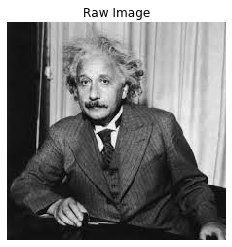

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

img_raw = 1.0 * plt.imread('../images/einstein.jpeg')

# It looks like my grey image includes 3 channels, although each of the values in each channel are identical... 
# I'll try to condense them down to a single channel
img = np.average(img_raw, axis=-1)
plt.imshow(img, cmap='gray')
plt.title('Raw Image')
plt.axis('off')

(-0.5, 224.5, 223.5, -0.5)

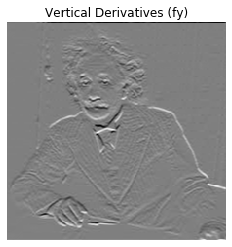

In [62]:
# compute vertical derivitaves and display image
v = np.array([[-0.125,-0.250,-0.125],[0,0,0],[0.125,0.250,0.125]])
vimg = ndimage.convolve(img, v, mode='constant')

plt.imshow(vimg, cmap='gray')
plt.title('Vertical Derivatives (fy)')
plt.axis('off')

(-0.5, 224.5, 223.5, -0.5)

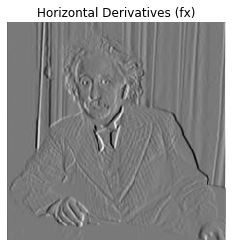

In [63]:
# compute and display horizontal derivatives
h = np.array([[-0.125,0,0.125],[-0.25,0,.25],[-0.125,0,0.125]])
himg = ndimage.convolve(img, h, mode='constant')

plt.imshow(himg, cmap='gray')
plt.title('Horizontal Derivatives (fx)')
plt.axis('off')

(-0.5, 224.5, 223.5, -0.5)

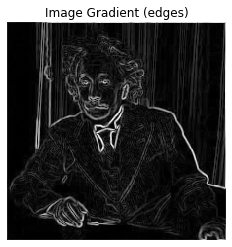

In [64]:
# square and sum the previous two values and display and image of the gradient
g = np.sqrt(vimg**2 + himg**2)

plt.imshow(g, cmap='gray')
plt.title('Image Gradient (edges)')
plt.axis('off')

## [Separable Convolutions](https://farid.berkeley.edu/learnComputerVision/lectures/cv-03-06-separableConvolution.mp4)

Ocassionally you can decompose your 2-D filter matrix into two 1-D filters which will functionally give the same result as we see above - but with sometimes very significant computational savings as the filter size increases. This is possible when your 2-D filter matrix is rank 2.

We can do this decomposion using SVD (Singular Value Decomposition) so that in this equation we used above:

$ g[x,y] = 
\sum\limits_{j=1}^m 
\sum\limits_{k=1}^n 
f[j,k]
h[x-j, y-k]
$

or, more concisely,

$ g[x,y] = f[x,y] \star h[x,y] $

we can decompose our filter, $h[x,y]$ as:

$h[x,y] = h_1[x]h_2[y] $

and then the new convolution can be a combination of those two 1-D vectors:

$g[x,y] = (f[x,y] \star h_1[x]) \star h_2[y] $

### Exercise #7 - Find gradient using separable filters

> Write some code to compute the image gradient using x-y separable filters

> See scipy.scipy.sepfir2

In [84]:
# using the filters v & h and img as defined above
uv, sv, vv = np.linalg.svd(v)
uh, sh, vh = np.linalg.svd(h)

print(f'U of Vertical Filter:\n {uv}\n')
print(f'S of Vertical Filter:\n {sv}\n')
print(f'V of Vertical Filter:\n {vv}\n')

print(f'U of Horizontal Filter:\n {uh}\n')
print(f'S of Horizontal Filter:\n {sh}\n')
print(f'V of Horizontal Filter:\n {vh}\n')

U of Vertical Filter:
 [[-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]
 [ 0.70710678  0.70710678  0.        ]]

S of Vertical Filter:
 [0.4330127 0.        0.       ]

V of Vertical Filter:
 [[ 0.40824829  0.81649658  0.40824829]
 [ 0.         -0.4472136   0.89442719]
 [ 0.91287093 -0.36514837 -0.18257419]]

U of Horizontal Filter:
 [[-0.40824829  0.91287093  0.        ]
 [-0.81649658 -0.36514837 -0.4472136 ]
 [-0.40824829 -0.18257419  0.89442719]]

S of Horizontal Filter:
 [4.33012702e-01 4.38854184e-17 0.00000000e+00]

V of Horizontal Filter:
 [[ 0.70710678  0.         -0.70710678]
 [ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]]



**Note:** because the above two filters have mirror symmetry then we can actually just transpose one filter to find the other... this is seen above where the first column of the $v$ matrix on our vertical filter is equal to -1 x the first row of the $u$ matrix on our horizontal matrix

In [87]:
col_vfilt = uv[:,0] # first col
row_vfilt = vv[0] # first row

col_hfilt = uh[:,0]
row_hfilt = vh[0]

print(f'U of Vertical: {col_vfilt}')
print(f'V of Vertical: {row_vfilt}\n')

print(f'U of Horizontal: {col_hfilt}')
print(f'V of Horizontal: {row_hfilt}')

U of Vertical: [-0.70710678  0.          0.70710678]
V of Vertical: [0.40824829 0.81649658 0.40824829]

U of Horizontal: [-0.40824829 -0.81649658 -0.40824829]
V of Horizontal: [ 0.70710678  0.         -0.70710678]


(-0.5, 224.5, 223.5, -0.5)

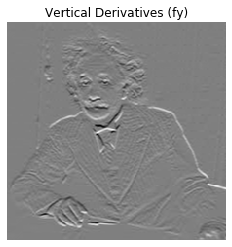

In [88]:
from scipy.signal import sepfir2d

sep_vimg = sepfir2d(img, row_vfilt, col_vfilt)

plt.imshow(sep_vimg, cmap='gray')
plt.title('Vertical Derivatives (fy)')
plt.axis('off')

(-0.5, 224.5, 223.5, -0.5)

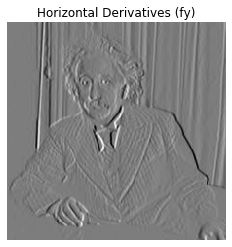

In [89]:
sep_himg = sepfir2d(img, row_hfilt, col_hfilt)

plt.imshow(sep_himg, cmap='gray')
plt.title('Horizontal Derivatives (fy)')
plt.axis('off')

(-0.5, 224.5, 223.5, -0.5)

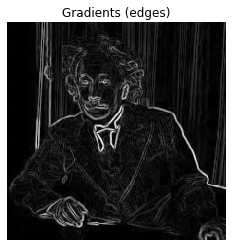

In [92]:
# And now we can compute the gradient using the derivatives found with our separable filters above:
sep_gimg = np.sqrt( sep_vimg**2 + sep_himg**2)

plt.imshow(sep_gimg, cmap='gray')
plt.title('Gradients (edges)')
plt.axis('off')

## Basis and Fourier

### Canonical Basis

We have been talking about vectors assuming a canonical basis - which is to say that if we have a 2 dimensional space we typically assume that our two basis vectors ($\hat i$ and $\hat j$) are 1 along the relevant axis and everything else is 0. 

So, the basis vector $\hat i$ in the x direction is (1,0) and the basis vector $\hat j$ in the y direction is (0,1). See the ["Change of Basis" video from 3Blue1Brown's Essence of Linear Algebra series](https://www.youtube.com/watch?v=P2LTAUO1TdA&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=13) for more intuition on that.

If we have a series of signals $[1,2,3,4,5,6,7]$, we assume that they map to a sum of "scaled and shifted impulses" - these are assumed to be using canonical basis:

```
1(1 0 0 0 0 0 0)
2(0 1 0 0 0 0 0)
3(0 0 1 0 0 0 0)
4(0 0 0 1 0 0 0)
5(0 0 0 0 1 0 0)
6(0 0 0 0 0 1 0)
7(0 0 0 0 0 0 1)
```

So our equation for a discrete signal can then be represented as a sum of some scaled and shifted impulses where $a_k$ is the scalar value we see above (1,2,3...7) and $b_k$ is the degree to which our impulse is shifted (as seen in the vectors above):

$f[x] = \sum\limits_{k=0}^{m-1} a_k b_k(x) $


But how do we find $a_k$? We just need to take the dot product between our input signal and corresponding basis vector:

$ a_k = \sum\limits_{l=0}^{m-1} f(l) b_k(l) $


### Fourier Series & Transform

Though we typically assume canonical basis when discussing vectors (as seen above), it's really just a convenient representation - but we can choose to use any basis we want instead of the canonical basis. 

In the Fourier series we use a $cos$ basis in the form of:

$f[x] = \frac{1}{m}
\sum\limits_{k=0}^{m-1} 
c_k \cos \bigg{(}
\frac{2 \pi k}{m} x + \phi_k \bigg{)}$

In the above expression we are describing our discrete series $f[x]$ with three important terms:

- **Frequency:** 
$\frac{2 \pi k}{m} $ above ... but this is more often represented as **$w_k x$**

- **Phase:** 
$\phi_k$ (phase shifted cosines are sinusoidal)

- **Amplitude:** 
$c_k$ (scale of cosine or sine function)

---
#### Fixing our basis

The problem is that our phase term $\phi_k$ aparently leaves us with a non-fixed basis because it is dependent on $k$ (each discrete signal) and we don't want that so we need a way to fix our basis

We can fix this by using the following trig identity:

$\cos(A+B) = \cos(A)\cos(B) - \sin(A)\sin(B)$

So the above equation can now be represented as:

$f[x] = \frac{1}{m}
\sum\limits_{k=0}^{m-1} 
c_k \cos(\phi_k) \cos(\omega_k x)- c_k \sin(\phi_k)(\sin(\omega_k x)$

But because the $\cos(\phi_k)$ and $-\sin(\phi_k)$ are just scale factors we can bundle them up with our other $c_k$ scale term (the amplitude) as $a_k$ and $b_k$ respectively:

$f[x] = \frac{1}{m}
\sum\limits_{k=0}^{m-1} 
a_k \cos(\omega_k x) + b_k(\sin(\omega_k x)$

*Note*: It sounds like the negative sign introduced in the trig identity for cosine has been absorbed into the $b_k$ term above

So now we've managed to pull our phase term $\phi_k$ out of the basis and into the scale term so our basis itself can remain fixed across each impulse in our discrete signal. But we have two fixed basis - the $\cos(\omega_k x)$ and $\sin(\omega_k x)$ terms - that we need to carry around

#### Questions:

- Looking at the following Fourier expression, why does the $_k$ in our phase term ($\phi_k$) create the non-fixed basis problem but the $_k$ in our frequency term ($\omega_k x$) does not? Put another way, how can I build intuition for the fact that we have a fixed basis when frequency modulated but a non-fixed basis when phase modulated?

$f[x] = \frac{1}{m}
\sum\limits_{k=0}^{m-1} 
c_k \cos(\omega_k x + \phi_k)$


---
### Fourier in 2D

We can similarly compute the Fourier transform in 2 dimensions, now with a double sum over every pixel in the image (in our case)

$f[x,y] = \frac{1}{m^2}
\sum\limits_{k=0}^{m-1} 
\sum\limits_{l=0}^{m-1}
c_{kl} \cos(\omega_k x + \omega_l y + \phi_{kl})$

But we have to do same thing we did above to remove the phase term $\phi_{kl}$ from the cos term to avoid having our basis changed every time we evaluate a pixel in the image. This leaves us with:

$f[x,y] = \frac{1}{m2}
\sum\limits_{k=0}^{m-1}
\sum\limits_{l=0}^{m-1}
a_{kl} \cos(\omega_k x + \omega_l y) + 
b_{kl}\sin(\omega_k x + \omega_l y)$

The above is now a statement that we can understand our discrete series with two basis which are frequency modulated but not phase modulated - though we still need to know how to find our scalar values $a_{kl}$ and $b_{kl}$!

We can do this by taking the dot product of the image (all pixel values) and the cos or sin basis:

$ a_{kl} = \sum\limits_{k=0}^{m-1}
\sum\limits_{l=0}^{m-1}
f[u,v] \cos(\omega_k u + \omega_l v)$

$ b_{kl} = \sum\limits_{k=0}^{m-1}
\sum\limits_{l=0}^{m-1}
f[u,v] \sin(\omega_k u + \omega_l v)$

#### Complex Exponential Representation
We can express the same statement above with a complex exponential instead of the cos term originally used:

$ f[x,y] = \frac{1}{m2}
\sum\limits_{k=0}^{m-1}
\sum\limits_{l=0}^{m-1}
c_{kl} e^{i(\omega_k x + \omega_l y)}$

And our new scale term, $c_{kl}$ can be found by taking the difference between $a_{kl}$ and $ib_{kl}$:

$ c_{kl} = a_{kl} - ib_{kl} = 
\sum\limits_{k=0}^{m-1}
\sum\limits_{l=0}^{m-1}
f[u,v] e^{i(\omega_k u + \omega_l v)}$

### Exercise #8 - Compute the log of the magnitude of the Fourier transform

> Write some code to compute the log of the magnitude of the Fourier transform of a grayscale image.

> See `numpy.fft.fft2` (note, origin of fft will be in top-left corner, see also `numpy.fft.fftshift` to place the origni in the image center).

Some verbal instructions:
1. Take a gray-scale image
2. Take the Fourier transform
3. Compute the magnitude (sqrt of the "cosine term" + "imaginary/sine term")
4. Take the log of the magnitude above

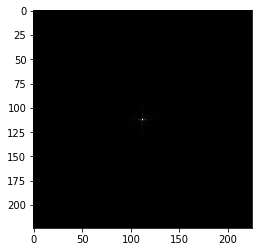

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# I'll re-use our einstein image and convert it to a single channel again
img_raw = 1.0 * plt.imread('../images/einstein.jpeg')
img = np.average(img_raw, axis=-1)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fmag = np.abs(fshift[:,:])
plt.imshow(fmag, cmap="gray")

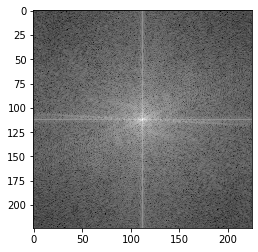

In [129]:
# Now let's plot the log of the magnitude
fmaglog = np.log(fmag)
plt.imshow(fmaglog, cmap="gray")

The problem log of the Fourier magnitude above would suggest strong vertical and horizontal shifts in the image (which is not the case in our image!)

It turns out this is an artifact because the Fourier transformation assumes the image/signal is periodic... which our image isn't (the top values do not match the bottom, same with left to right). So the strong lines we see are due to the fact that we have the cut-offs at the edges of our image which do not match up when you wrap it around in a continuous fashion. 

Hany shows us how to account for that by creating hanning windows, as in his solution below:

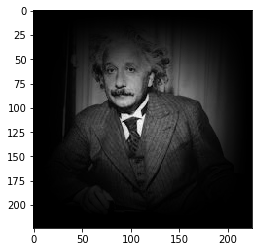

In [131]:
[ydim,xdim] = img.shape
win = np.outer( np.hanning(ydim), np.hanning(xdim))
win = win / np.mean(win) # make unit-mean

win_img = img*win
plt.imshow(win_img, cmap='gray')

This window supresses values at the edges of the image down to 0 so that it forces periodicity in the image overall. Now we can take the magnitude and log(magnitude)

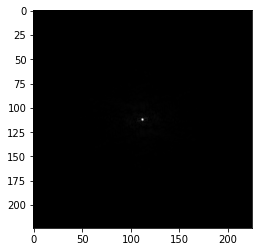

In [132]:
F = np.fft.fftshift(np.fft.fft2(win_img))
Fmag = np.abs(F)
plt.imshow(Fmag, cmap='gray')

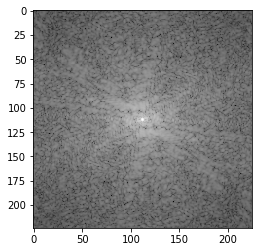

In [134]:
# Now let's plot the log of the magnitude
Fmaglog = np.log(Fmag)
plt.imshow(Fmaglog, cmap="gray")

## Pyramids

### Gaussian Pyramid
Pyramids are a way to reduce the dimensionality down to a smaller size for computational efficiency by walking down the pyramid (slightly burring then down-sampling the image to make the image smaller).

This method will retain all the Fourier information from the smaller images at each larger interval

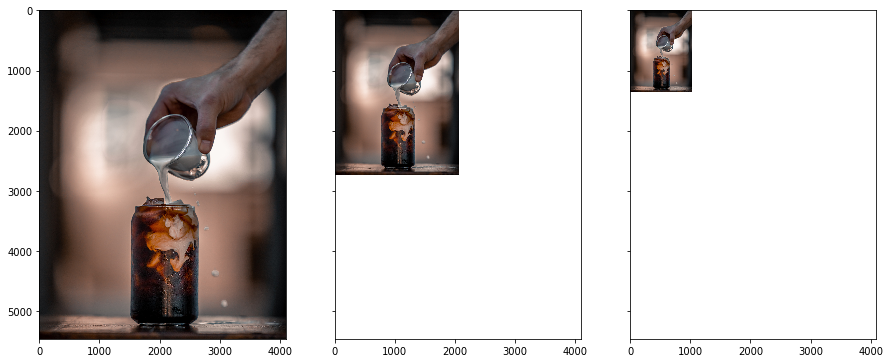

In [4]:
from scipy.signal import sepfir2d

im = plt.imread('../images/rudy-rasmus-D9T9fI2Om3U-unsplash.jpeg')
h = [1/16, 4/16, 6/16, 4/16, 1/16]; # blur filter - values sum to 1
N = 3 # Number of pyramid levels

P = [] # This will store our pyramid
P.append(im) # first pyramid level
for k in range(1,N): # add the other pyramid levels
    im2 = np.zeros( im.shape )
    for z in range(3): # Three channels because image is color
        im2[:,:,z] = sepfir2d( im[:,:,z], h, h) # blur each color channel with the separable filter
    im2 = im2[0:-1:2, 0:-1:2, :] # down sample by removing every other pixel
    im = im2.astype(int)
    P.append(im2)
    
# display first pyramid
fig, ax = plt.subplots(nrows=1, ncols=N, figsize=(15,7), dpi=72, sharex=True, sharey=True)
for k in range(N-1,-1,-1):
    ax[k].imshow(P[k].astype(np.uint8))


### Laplacian Pyramids

These are similar to Gaussian Pyramids but will describe the difference in Fourier frequency space between each layer of the Gaussian pyramid. In this way we're able to do analysis on specific frequencies present at each of the levels (rather than a cumulative representation of all lower levels). 

We can accomplish this by first building out a Gaussian Pyramid and then at each layer up-sampling and taking the difference between the up-sampled image and the original image (before it was down-sampled) at that level. 

In [5]:
from cv2 import cv2

# First we're going to create the Gaussian pyramid like we did above, but we'll make 4 layers since the Laplacian pyramid will not include the lowest level
im = plt.imread('../images/rudy-rasmus-D9T9fI2Om3U-unsplash.jpeg')
h = [1/16, 4/16, 6/16, 4/16, 1/16]; # blur filter - values sum to 1
N = 4 # Number of levels in gaussian

G = [] # This will store our pyramid
G.append(im) # first pyramid level
for k in range(1,N): # add the other pyramid levels
    im2 = np.zeros( im.shape )
    for z in range(3): # Three channels because image is color
        im2[:,:,z] = sepfir2d( im[:,:,z], h, h) # blur each color channel with the separable filter
    im2 = im2[0:-1:2, 0:-1:2, :] # down sample by removing every other pixel
    im = im2.astype(int)
    G.append(im2)
    
L = [] # Laplacian pyramid
for k in range(0, N-1): # build Laplacian pyramid from Gaussian
    l1 = G[k]
    l2 = G[k+1]
    l2 = cv2.resize(l2, (0,0), fx=2, fy=2) # up-sample
    D = l1 - l2 # take difference between the Gaussian pyramid level (k) and the up-sampled (k+1) level
    D = D - np.min(D) # scale in [0,1]
    D = D / np.max(D) # for display purposes
    L.append(D)
L.append(G[N-1])
    
# display first pyramid
fig, ax = plt.subplots(nrows=1, ncols=N, figsize=(15,7), dpi=72, sharex=True, sharey=True)
for k in range(N-1,-1,-1):
    ax[k].imshow(L[k].astype(np.uint8))

ModuleNotFoundError: No module named 'cv2'

In [2]:
! pip install opencv-python